In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('Nat_Gas.csv')

# Convert 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')

# Sort data by date
data = data.sort_values(by='Dates')

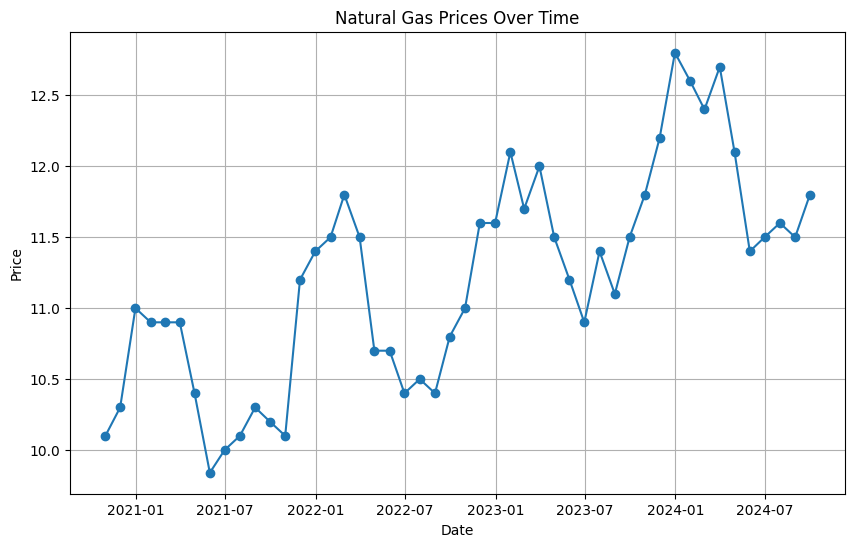

In [5]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [9]:
def estimate_price_for_date(date):
    # Fit a linear regression model
    X = data['Dates'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
    y = data['Prices'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    # Convert input date to timestamp
    date_timestamp = datetime.timestamp(date)
    
    # Predict price for the given date and extrapolate for one year into the future
    future_date_timestamp = date_timestamp + 365 * 24 * 60 * 60  # Add one year in seconds
    price_estimate = model.predict([[date_timestamp], [future_date_timestamp]])
    
    return price_estimate[0][0], price_estimate[1][0]

In [10]:
# Example usage
input_date = datetime.strptime('2023-05-15', '%Y-%m-%d')
estimated_price, extrapolated_price = estimate_price_for_date(input_date)
print(f"Estimated price for {input_date.date()}: {estimated_price}")
print(f"Extrapolated price for one year ahead: {extrapolated_price}")

Estimated price for 2023-05-15: 11.478145052771273
Extrapolated price for one year ahead: 11.946211416318752
